# Business Problem: Election Signature Verification

## Problem Description 

In an electoral system, ensuring the integrity of votes is paramount. One critical aspect is signature verification. When voters cast their ballots, their signatures are recorded. Election officials must verify these signatures to prevent fraud and ensure that only valid votes are counted. However, manual signature verification has limitations:

1. **Time-Consuming**: Verifying thousands of signatures manually is labor-intensive and time-consuming.
2. **Error-Prone**: Human judgment can be subjective, leading to errors.
3. **Bias**: Election officials may unintentionally introduce bias during verification.

The goal is to develop an **automated signature verification system** that enhances accuracy, reduces manual effort, and maintains the integrity of the electoral process.ion.

## Business Objectives

1. **Accuracy Improvement**: Develop a system that accurately classifies signatures as genuine or fraudulent.
2. **Efficiency Enhancement**: Reduce the time and effort required for manual verification.
3. **Security and Fairness**: Ensure that only valid votes are counted, maintaining trust in the electoral system.

##  Data Available

1. **Voter Registration Data**: Includes voter information (name, address, etc.) and their registered signatures.
2. **Election Ballots**: Contains scanned images of voter signatures on the ballots.
3. **Historical Data**: Previous election data with verified signatures.

##  Challenges

1. **Variability in Signatures**: Voters’ signatures can vary significantly due to factors like fatigue, haste, or changes over time.
2. **Imbalanced Data**: Genuine signatures significantly outnumber fraudulent ones, making model training challenging.
3. **Feature Extraction**: Extracting relevant features from signature images is crucial for accurate classification.

## Proposed Solutions

1. **Feature Engineering**: Extract features from signature images (stroke patterns, curvature, pressure points). Use techniques like Fourier descriptors or wavelet transforms. Normalize features to account for size and orientation variations.
2. **Machine Learning Models**: Train supervised models (SVM, Random Forest, deep learning) using labeled data. Use k-fold cross-validation for evaluation. Optimize hyperparameters for better accuracy.
3. **Ensemble Methods**: Combine models (stacking, boosting) to improve overall performance. Handle imbalanced data effectively.
4. **Threshold Tuning**: Set an appropriate threshold for accepting/rejecting signatures. Balance false positives (accepting fraudulent signatures) and false negatives (rejecting genuine signatures).
5. **Real-time Deployment**: Deploy the model during elections. Integrate with ballot scanning systems for automatic verification.

## Reading PDF File

### Converting each page into image i.e. jpg format

<p>We are detecting borders from PDF each page, then cropping those borders. After that we are dividing height into 4 parts and width into 2 parts to get 8 images from one page and saving these images</p>

In [1]:
import cv2
from PIL import Image
from pdf2image import convert_from_path
import os

def crop_image(file_path, output_folder):
    # Load the image
    img = cv2.imread(file_path)


    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect edges with Canny
    edges = cv2.Canny(blur, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming the largest contour is the border
    border_contour = max(contours, key=cv2.contourArea)

    # Get the bounding rectangle for the largest contour
    x, y, w, h = cv2.boundingRect(border_contour)

    # Crop the image using the bounding rectangle coordinates
    cropped_img = img[y:y+h, x:x+w]

    # Save the cropped image with a unique name
    cropped_image_path = os.path.join(output_folder, os.path.basename(file_path).replace('.jpg', '_cropped.jpg'))
    cv2.imwrite(cropped_image_path, cropped_img)

    # Load the cropped image with PIL
    img = Image.open(cropped_image_path)

    # Get the dimensions of the image
    img_width, img_height = img.size

    # Assuming there are 8 signatures per page
    signature_width = img_width // 2
    signature_height = img_height // 4

    # Crop out each signature
    signatures = []
    for i in range(4):  
        for j in range(2):
            left = j * signature_width
            upper = i * signature_height
            right = left + signature_width
            lower = upper + signature_height
            box = (left, upper, right, lower)
            signature = img.crop(box)
            signatures.append(signature)

    # Save each signature with a unique name
    for idx, signature in enumerate(signatures):
        signature_path = os.path.join(output_folder, f'signature_{os.path.basename(file_path).replace(".jpg", "")}_{idx + 1}.jpg')
        signature.save(signature_path, 'JPEG')

# Path to the PDF
pdf_path = '4.pdf'
output_folder = 'output_signatures'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Convert PDF pages to images
images = convert_from_path(pdf_path)

# Process each page
for i, img in enumerate(images):
    page_path = os.path.join(output_folder, f'page{i}.jpg')
    img.save(page_path, 'JPEG')
    crop_image(page_path, output_folder)



KeyboardInterrupt



## Image Crop

<p>In this we are checking for borders for each of the signature images. After detceting borders we are cropping the image accordingly. In output we have images without any borders</p>

In [ ]:
import cv2
import os
count1=1
# Base directory where your images are stored

base_dir = r'Images\1'

# Define the new base directory for cropped images
cropped_dir = r'Images\resize1'

# Iterate over a range of numbers that corresponds to your file numbering
for i in range(1,81):  

    filename = f'{i}.jpg'
    file_path = os.path.join(base_dir, filename)

    # Read the image
    image = cv2.imread(file_path)

    # Check if the image was loaded properly
    if image is not None:
        y, x, h, w = 50, 50, 400, 600

        # Crop the image
        crop_image = image[y:y+h, x:x+w]
        

        # Construct the new filename for the cropped image
        cropped_filename = f'{count1}.jpg'
        cropped_file_path = os.path.join(cropped_dir, cropped_filename)

        # Save the cropped image
        cv2.imwrite(cropped_file_path, crop_image)
        count1+=1
        print(f"Cropped image saved as: {cropped_filename}")
    else:
        print(f"The image file at {file_path} could not be loaded. Please check the file path and try again.")


## Resize and Grayscale

<p>In this we are converting images into grayscale and resizing it to 100 X 100</p>

In [ ]:
from PIL import Image

# Load the image
for j in range(1,10):
    for i in range(1, 81):
        image_path = fr'Images\resize{j}\{i}.jpg' 
        original_image = Image.open(image_path)
        grayscale_image = original_image.convert('L')
        # Resize the image
        resized_image = grayscale_image.resize((100, 100))
    
        # Save the resized image
        resized_image_path = fr'Images\resize{j}\{i}.jpg' 
        resized_image.save(resized_image_path)
    
        print(resized_image_path)


## Augmentation

<p>We are trying to increase the dataset by augmenting the images. We have used rotation 1, 30, 50, and 5 degress in combination, zoom levels of 1.8, 0.5, 2.2, 0.2. We have also used shear ranges from 5 to 10 and flipped horizontally. These new images are stored inside new folders. For each signature we have a different folder.</p>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import os

# Base directory for saving augmented images
for i in range(1,10):
    save_dir = fr'Images\augmented{i}'
    os.makedirs(save_dir)

    # Lists of transformations
    degrees_list = [1, 30, 50, 5]
    zoom_levels = [(1.8, 0.5),(2.2,0.2)]  
    shear_ranges = [5, 10]  
    flip_options = [True, False]  

    # Load and augment each image
    if i==7 or i==2:
        image_value=41
    else:
        image_value=81
    for j in range(1, image_value): 
        img_path = fr'Images\resize{i}\{j}.jpg'
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1, ) + x.shape)  

        # Iterate over each transformation combination
        for degree in degrees_list:
            for zoom in zoom_levels:
                for shear in shear_ranges:
                    for flip in flip_options:
                        datagen = ImageDataGenerator(
                            rotation_range=degree,
                            zoom_range=zoom,
                            shear_range=shear,
                            horizontal_flip=flip
                        )
                        
                        count1 = 80 + degree 

                        
                        for batch in datagen.flow(x, batch_size=1, save_to_dir=save_dir, 
                                                  save_prefix=f'{count1}_{j}_zoom{zoom}_shear{shear}_flip{flip}', save_format='jpeg'):
                            break  


## Creating Dataset

<p>We will now merge all the images which include original cropped images and augmented images. We have created 2 numpy arrays for image and labels. In total we have 21120 images.</p>

In [1]:
import os
import cv2
import numpy as np
images = []
labels = []

for i in range(1,10):
    dataset_dir = [fr'Images\resize{i}',fr'Images\augmented{i}']
            
    # Loop through each directory in the dataset_dir list
    for dir_path in dataset_dir:
        label = dir_path[-1]
        
        for image_file in os.listdir(os.path.join(dir_path)):
            
            if image_file.endswith(".jpg") or image_file.endswith(".jpeg"):
               
                file_path = os.path.join(dir_path, image_file)
                
                image = cv2.imread(file_path)
                
                images.append(image)
               
                labels.append(label)


# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [2]:
images.shape

(21120, 100, 100, 3)

In [3]:
labels

array(['1', '1', '1', ..., '9', '9', '9'], dtype='<U1')

<p>Below code gives us shuffled data</p>

In [4]:
data = list(zip(images, labels))
np.random.shuffle(data)
shuffled_images, shuffled_labels = zip(*data)
shuffled_images = np.array(shuffled_images)
shuffled_labels = np.array(shuffled_labels)

In [5]:
shuffled_images.shape

(21120, 100, 100, 3)

In [6]:
data = np.array([image.flatten() for image in shuffled_images])

In [7]:
data.shape

(21120, 30000)

<p>We can see some sample images below</p>

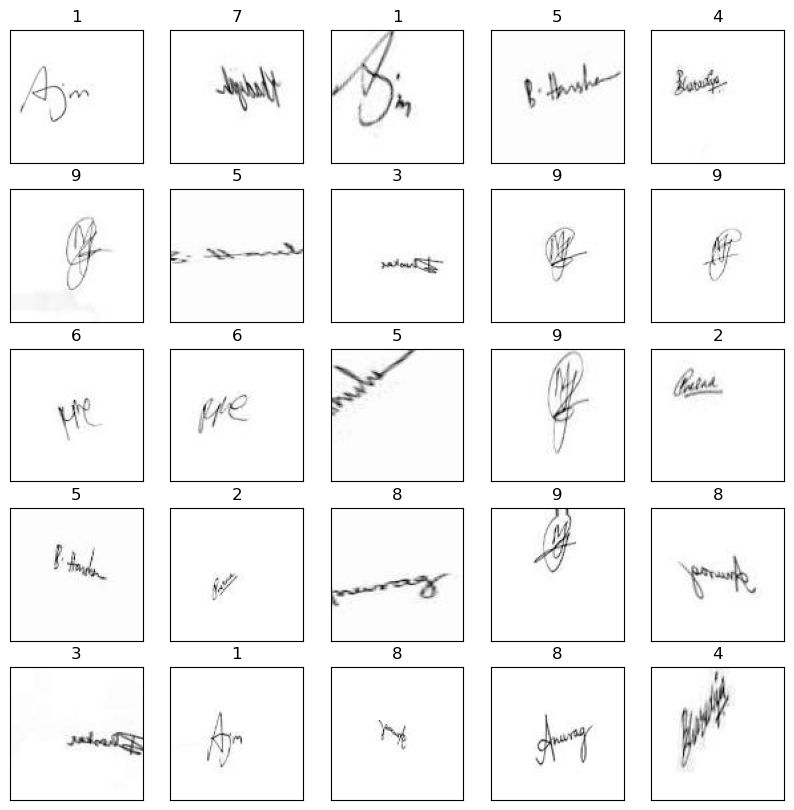

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5, figsize=(10, 10)) 
for i, axi in enumerate(ax.flat):
    axi.imshow(shuffled_images[i]) 
    axi.set_title(shuffled_labels[i]) 
    axi.set(xticks=[], yticks=[])

## PCA

<p>Since we have 30000 total features we tried to reduce feature size by keeping 95% variance in the dataset</p>

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=0) 
X_pca = pca.fit_transform(data)

In [13]:
X_pca.shape

(21120, 2034)

In [79]:
pickle_out = open("X_pca.pickle", "wb")
pickle.dump(X_pca, pickle_out, protocol=4)
pickle_out.close()

### Splitting dataset and Scaling

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, shuffled_labels, test_size=0.3, random_state=42, stratify=shuffled_labels)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
import pickle
pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out, protocol=4)
pickle_out.close()
pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out, protocol=4)
pickle_out.close()

In [78]:
import pickle
pickle_out = open("X_train_scaled.pickle", "wb")
pickle.dump(X_train_scaled, pickle_out, protocol=4)
pickle_out.close()
pickle_out = open("X_test_scaled.pickle", "wb")
pickle.dump(X_test_scaled, pickle_out, protocol=4)
pickle_out.close()

In [80]:
pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out, protocol=4)
pickle_out.close()
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out, protocol=4)
pickle_out.close()

In [4]:
import pickle
pickle_in = open("X_train.pickle", "rb")
X_train = pickle.load(pickle_in)
pickle_in = open("y_train.pickle", "rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("y_test.pickle", "rb")
y_test = pickle.load(pickle_in)

pickle_in = open("X_train_scaled.pickle", "rb")
X_train_scaled = pickle.load(pickle_in)
pickle_in = open("X_test_scaled.pickle", "rb")
X_test_scaled = pickle.load(pickle_in)


In [24]:
import numpy as np
import pandas as pd

# Assuming X_test is your numpy array
df = pd.DataFrame(X_test)

# Optionally, you can specify column names if needed
# df = pd.DataFrame(X_test, columns=['Column1', 'Column2', 'Column3', ...])

# Now save the DataFrame to a CSV file
df.to_csv("xtest.csv", index=False)  # index=False if you do not want to save row indices in the file


## Stochastic Gradient Descent Classifier

<p>SGD stands for Stochastic Gradient Descent. It's an optimization algorithm commonly used in machine learning and deep learning for training models. SGD works by iteratively adjusting the parameters of a model to minimize a given loss function. Unlike traditional gradient descent, which computes the gradient of the loss function using the entire dataset, stochastic gradient descent computes the gradient using a randomly selected subset of the data at each iteration, making it computationally more efficient, especially for large datasets.</p>

<p>Accuarcy is <b>39%</b> and precision, recall and F1 score is varying across all classes. hence compared to other models its all factors are low</p>

In [6]:
from sklearn.linear_model import SGDClassifier
sgd_clf_sc = SGDClassifier(random_state=0)
sgd_clf_sc.fit(X_train_scaled, y_train)
with open('SGD_Scaled_model_pickle.pkl', 'wb') as f:
    pickle.dump(sgd_clf_sc, f)

In [7]:
with open('SGD_Scaled_model_pickle.pkl', 'rb') as f:
    loaded_model_SGD_Scaled = pickle.load(f)

In [8]:
from sklearn.metrics import classification_report
y_pred_1_test = sgd_clf_sc.predict(X_test_scaled)
y_pred_1_train = sgd_clf_sc.predict(X_train_scaled)
print(classification_report(y_test, y_pred_1_test))

              precision    recall  f1-score   support

           1       0.37      0.39      0.38       792
           2       0.47      0.32      0.38       396
           3       0.23      0.25      0.24       792
           4       0.35      0.41      0.38       792
           5       0.28      0.31      0.30       792
           6       0.32      0.37      0.34       792
           7       0.45      0.28      0.35       396
           8       0.59      0.52      0.55       792
           9       0.61      0.55      0.58       792

    accuracy                           0.39      6336
   macro avg       0.41      0.38      0.39      6336
weighted avg       0.40      0.39      0.39      6336



In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(X_train, y_train)
with open('SGD_model_pickle.pkl', 'wb') as f:
    pickle.dump(sgd_clf, f)

In [10]:
with open('SGD_model_pickle.pkl', 'rb') as f:
    loaded_model_SGD = pickle.load(f)

In [11]:
y_pred_1_test = sgd_clf.predict(X_test)
y_pred_1_train = sgd_clf.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_1_test))

              precision    recall  f1-score   support

           1       0.32      0.27      0.29       792
           2       0.30      0.19      0.24       396
           3       0.23      0.30      0.26       792
           4       0.29      0.18      0.22       792
           5       0.27      0.34      0.30       792
           6       0.22      0.18      0.19       792
           7       0.20      0.17      0.18       396
           8       0.46      0.56      0.50       792
           9       0.50      0.57      0.53       792

    accuracy                           0.32      6336
   macro avg       0.31      0.31      0.30      6336
weighted avg       0.32      0.32      0.31      6336



## AdaBoost

<p>AdaBoost stands for Adaptive Boosting. It's a machine learning algorithm used for classification and regression tasks. AdaBoost works by combining multiple weak learners (typically decision trees or other simple models) to create a strong ensemble model. It focuses on improving the performance of the overall ensemble by giving more weight to the training instances that were previously misclassified. Each weak learner is trained sequentially, with the weights of misclassified instances adjusted in each iteration. By iteratively focusing on the difficult-to-classify instances, AdaBoost can create a powerful ensemble model capable of achieving high accuracy on complex classification tasks</p>

<p>Accuarcy is <b>51%</b> it is more than SGD, specially for classes 2,5,8 and 9. Generally it has higher precisoon and recall score than SGD.</p>

In [24]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf_sc = AdaBoostClassifier(random_state=0)
adaboost_clf_sc.fit(X_train_scaled, y_train)
with open('adaboost_clf_sc.pkl', 'wb') as f:
    pickle.dump(adaboost_clf_sc, f)
y_pred_ada = adaboost_clf_sc.predict(X_test_scaled)

In [25]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           1       0.48      0.51      0.49       792
           2       0.38      0.57      0.46       396
           3       0.45      0.31      0.37       792
           4       0.51      0.45      0.47       792
           5       0.51      0.59      0.55       792
           6       0.44      0.40      0.42       792
           7       0.46      0.42      0.44       396
           8       0.55      0.62      0.58       792
           9       0.71      0.70      0.71       792

    accuracy                           0.51      6336
   macro avg       0.50      0.51      0.50      6336
weighted avg       0.51      0.51      0.50      6336



In [26]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=0)
adaboost_clf.fit(X_train, y_train)
with open('adaboost_clf.pkl', 'wb') as f:
    pickle.dump(adaboost_clf, f)
y_pred_ada = adaboost_clf.predict(X_test)
# y_pred

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           1       0.48      0.51      0.49       792
           2       0.38      0.57      0.46       396
           3       0.45      0.31      0.37       792
           4       0.51      0.45      0.47       792
           5       0.51      0.59      0.55       792
           6       0.44      0.40      0.42       792
           7       0.46      0.42      0.44       396
           8       0.55      0.62      0.58       792
           9       0.71      0.70      0.71       792

    accuracy                           0.51      6336
   macro avg       0.50      0.51      0.50      6336
weighted avg       0.51      0.51      0.50      6336



In [81]:
pickle_out = open("adaboost_clf.pickle", "wb")
pickle.dump(adaboost_clf, pickle_out, protocol=4)
pickle_out.close()

In [82]:
pickle_out = open("adaboost_clf_sc.pickle", "wb")
pickle.dump(adaboost_clf_sc, pickle_out, protocol=4)
pickle_out.close()

## Support Vector Classifier

<p>SVC stands for Support Vector Classifier. It's a type of supervised learning algorithm used for classification tasks. SVC is a part of the broader class of Support Vector Machines (SVM), which are highly effective in high-dimensional spaces and can handle both linear and non-linear data.
The basic idea behind SVC is to find the hyperplane that best separates the classes in the feature space. In cases where the data is not linearly separable, SVC uses a kernel trick to map the input data into a higher-dimensional space where it becomes linearly separable. This allows SVC to find a separating hyperplane even in non-linearly separable cases.
SVC aims to maximize the margin between the classes, which helps in improving the generalization ability of the classifier and makes it less prone to overfitting. Additionally, SVC can handle both binary and multi-class classification problems.
In summary, SVC is a powerful classifier that is widely used in various domains for its ability to handle complex classification tasks and its robustness against overfitting</p>

<p>Accuracy for this model is <b>80%</b> which <b>Highest</b> among all models. It has high precison, recall and F1 score comapred tp other models</p>

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model = SVC(kernel='rbf',  class_weight='balanced')
svm_model.fit(X_train, y_train)
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [14]:
with open('svm_model.pkl', 'rb') as f:
    loaded_model_svm = pickle.load(f)

In [15]:
svm_predictions = loaded_model_svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83       792
           2       0.78      0.84      0.81       396
           3       0.72      0.68      0.70       792
           4       0.77      0.78      0.78       792
           5       0.76      0.81      0.79       792
           6       0.82      0.69      0.75       792
           7       0.83      0.78      0.80       396
           8       0.81      0.90      0.85       792
           9       0.90      0.91      0.91       792

    accuracy                           0.80      6336
   macro avg       0.80      0.80      0.80      6336
weighted avg       0.80      0.80      0.80      6336



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model_sc = SVC(kernel='rbf',  class_weight='balanced')
svm_model_sc.fit(X_train_scaled, y_train)
with open('svm_model_sc.pkl', 'wb') as f:
    pickle.dump(svm_model_sc, f)

In [ ]:
svm_predictions_sc_outsample = loaded_model_svm_sc.predict(X_test_scaled)
svm_predictions_sc_insample = loaded_model_svm_sc.predict(X_trained_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

## Random Forest

<p>Random Forest is a versatile machine learning algorithm used for both classification and regression tasks. It belongs to the ensemble learning family, where multiple models are combined to improve the overall performance.
Here's how Random Forest works:
- Bootstrap Sampling (Random Sampling with Replacement): Random Forest builds multiple decision trees by repeatedly sampling the training data with replacement (bootstrap samples). This creates multiple subsets of the original data, ensuring diversity among the trees.
Feature Randomness: For each tree in the forest, a random subset of features is selected at each node to split on. This adds an extra layer of randomness and prevents individual trees from dominating the ensemble.
- Decision Trees: Each decision tree is grown to its maximum depth or until the number of samples in a node falls below a certain threshold. The trees are typically unpruned, meaning they are allowed to grow without any restriction.
Voting (Classification) or Averaging (Regression): In classification tasks, each tree in the forest casts a vote for the class, and the class with the most votes is predicted as the output. In regression tasks, the predictions of all trees are averaged to obtain the final output.</p>

<p>Accuracy is <b>71%</b>, good performance but lower compared to SVM. In some classes precision and recall is relatively low. </p>

In [ ]:
import time

start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [20, 30, 50, 60],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [200, 500, 800, 1000]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(X_train, y_train)

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=35,
                                       n_estimators=850,
                                       oob_score=True)

classifier_rf.fit(X_train, y_train)
with open('classifier_rf.pkl', 'wb') as f:
    pickle.dump(classifier_rf, f)

In [ ]:
with open('classifier_rf.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

In [26]:
y_predict_rf=classifier_rf.predict(X_test)
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           1       0.82      0.71      0.76       792
           2       0.92      0.65      0.76       396
           3       0.58      0.60      0.59       792
           4       0.67      0.80      0.73       792
           5       0.62      0.76      0.68       792
           6       0.77      0.60      0.67       792
           7       0.99      0.21      0.35       396
           8       0.70      0.86      0.77       792
           9       0.75      0.90      0.81       792

    accuracy                           0.71      6336
   macro avg       0.76      0.68      0.68      6336
weighted avg       0.73      0.71      0.70      6336



In [41]:
classifier_rf_sc = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=30,
                                       n_estimators=850,
                                       oob_score=True)

classifier_rf_sc.fit(X_train_scaled, y_train)
y_predict_rf=classifier_rf_sc.predict(X_test_scaled)
print(classification_report(y_test, y_predict_rf))

              precision    recall  f1-score   support

           1       0.81      0.70      0.75       792
           2       0.92      0.66      0.77       396
           3       0.59      0.60      0.60       792
           4       0.68      0.80      0.74       792
           5       0.62      0.75      0.68       792
           6       0.76      0.61      0.68       792
           7       0.98      0.23      0.37       396
           8       0.69      0.87      0.77       792
           9       0.75      0.89      0.81       792

    accuracy                           0.71      6336
   macro avg       0.76      0.68      0.69      6336
weighted avg       0.73      0.71      0.70      6336



In [85]:
pickle_out = open("classifier_rf.pickle", "wb")
pickle.dump(classifier_rf, pickle_out, protocol=4)
pickle_out.close()

In [86]:
pickle_out = open("classifier_rf_sc.pickle", "wb")
pickle.dump(classifier_rf_sc, pickle_out, protocol=4)
pickle_out.close()

# Logistic Regression

<p>Logistic Regression gave an accuracy of <b>39%</b>.

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=5000)
log_reg.fit(X_train, y_train)

C:\Users\bkb6542\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000, multi_class='multinomial')

In [27]:
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.31      0.34       792
           2       0.37      0.54      0.44       396
           3       0.28      0.26      0.27       792
           4       0.37      0.37      0.37       792
           5       0.31      0.25      0.28       792
           6       0.31      0.25      0.28       792
           7       0.30      0.43      0.35       396
           8       0.50      0.54      0.52       792
           9       0.55      0.58      0.56       792

    accuracy                           0.38      6336
   macro avg       0.37      0.39      0.38      6336
weighted avg       0.38      0.38      0.38      6336



### Models Summary

<p>The SVM classifier performs the best among the models considered, with the highest accuracy and generally high precision, recall, and F1-score across all classes.</p>
<p>ADABoost also shows competitive performance with relatively balanced precision, recall, and F1-score across classes, although its accuracy is lower than SVM.</p>
<p>Random Forest performs reasonably well but has lower accuracy compared to SVM and ADABoost, and it exhibits lower precision and recall for certain classes.</p>

## Best Model

<p><b>SVM</b> gave us best best accuracy along with good precision for all classes, hence we have selectded it as best model.</p>

Below is the code with entire data and we have saved it in a pickle model

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svm_model_best_model = SVC(kernel='rbf',  class_weight='balanced')
svm_model_best_model.fit(data, shuffled_labels)


NameError: name 'pickle' is not defined

In [10]:
import pickle
with open('svm_model_best_model.pkl', 'wb') as f:
    pickle.dump(svm_model_best_model, f)

In [11]:
with open('svm_model_best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

### Learning Curve

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
size = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
accuracy_score_train = []
accuracy_score_test = []
for N in size:
    
    X_train, X_test, y_train, y_test = train_test_split(data, shuffled_labels, test_size=0.3, random_state=0)
    model = SVC(kernel='rbf',class_weight='balanced' )
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    accuracy_score_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_score_test.append(accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(size, accuracy_score_train, label='Train Accuracy')
plt.plot(size, accuracy_score_test, label='Test Accuracy')
plt.xlabel("Sample Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for SVC")
plt.legend()
plt.show()

### Input for testing

In [45]:
from PIL import Image
import os
folder_path = fr'Images\testing'
i=0
for file_name in os.listdir(folder_path):
        if file_name.lower().endswith(('.jpg')) or file_name.lower().endswith(('.jpeg')):
            
            file_path = os.path.join(folder_path, file_name)
           
            original_image = Image.open(file_path)
            grayscale_image = original_image.convert('L')
            # Resize the image
            resized_image = grayscale_image.resize((100, 100))
            target_dir = r'Images\testing\resize'
            # Save the resized image
            i +=1
            resized_image_path = fr'Images\testing\resize\resize_{i}.jpg'
            print(resized_image_path)
            resized_image.save(resized_image_path)

Images\testing\resize\resize_1.jpeg


In [37]:
import os
import cv2
import numpy as np
images = []
labels = []
dataset_dir = r'Images\testing\testimages1'
for image_file in os.listdir(os.path.join(dataset_dir)):
    if image_file.endswith(".jpg") or image_file.endswith(".jpeg"):
        # Construct full file path
        file_path = os.path.join(dataset_dir, image_file)
        # Read image
        image = cv2.imread(file_path)
        name= image_file.split('.')
        label = name[0]
        # Append image to images list
        images.append(image)
        # Append label or directory name to labels list
        labels.append(label)
 
# Convert lists to numpy arrays
images_t = np.array(images)
labels_t = np.array(labels)

In [38]:
images_t.shape

(80, 100, 100, 3)

In [39]:
data_test = np.array([image.flatten() for image in images_t])

In [40]:
# Perform prediction
model_predictions = best_model.predict(data_test)
 
# Print predictions
print(model_predictions)

['3' '1' '1' '1' '1' '8' '4' '3' '1' '3' '3' '1' '3' '3' '8' '2' '5' '3'
 '1' '3' '1' '2' '3' '3' '1' '4' '4' '5' '1' '1' '3' '3' '1' '7' '2' '4'
 '3' '8' '3' '1' '1' '1' '8' '1' '1' '3' '1' '3' '1' '1' '3' '1' '5' '3'
 '4' '3' '3' '5' '1' '1' '1' '1' '1' '3' '1' '8' '4' '1' '8' '1' '1' '1'
 '8' '1' '4' '1' '5' '1' '1' '8']


In [42]:
d1={}
for i in model_predictions:
    if i not in d1:
        d1[i]=1
    else:
        d1[i]+=1
print(d1)

{'3': 21, '1': 35, '8': 8, '4': 7, '2': 3, '5': 5, '7': 1}


# Conclusion

SVM (Support Vector Machine) model is the best choice for the task of classifying images containing signatures. Here's why:
 
1. **High Accuracy:** The SVM model achieved the highest accuracy of 0.80, indicating that it correctly classified 80% of the instances in the dataset.
 
2. **Precision, Recall, and F1-score:** The SVM model achieved high precision, recall, and F1-score across all classes. This suggests that the model performed well in both identifying genuine signatures (high precision) and correctly capturing all instances of genuine signatures (high recall).
 
3. **Consistency:** The macro-average and weighted-average precision, recall, and F1-score are also high for the SVM model, indicating consistent performance across all classes and weighted by the class support.
 
4. **Robustness:** The SVM model's performance metrics are consistent and robust, indicating its ability to handle the variability in signatures and generalize well to unseen data.
 
5. **Interpretability:** SVMs offer good interpretability, as they find the optimal hyperplane that best separates the classes. This allows election officials to understand how the model makes decisions and trust its outcomes.
 
6. **Handling Imbalanced Data:** SVMs can handle imbalanced data well, which is a common challenge in signature verification tasks where genuine signatures significantly outnumber fraudulent ones.
 
Overall, the SVM model's combination of high accuracy, precision, recall, and F1-score, along with its consistency and interpretability, makes it the most suitable choice for the task of classifying images containing signatures in the electoral system.

# Future Scope of Signature Verification Systems

## 1. Enhanced Feature Extraction Techniques

### Deep Learning Embeddings
- Explore advanced deep learning techniques (e.g., convolutional neural networks, recurrent neural networks) to learn powerful feature representations directly from signature images.
- Embeddings can capture intricate details, such as stroke patterns, pressure points, and curvature, leading to improved accuracy.

### Domain-Specific Features
- Investigate domain-specific features relevant to signature verification.
- For example, consider incorporating pen pressure dynamics, pen angle, or speed during signature capture.

## 2. Dynamic Thresholds and Confidence Scores

### Adaptive Thresholding
- Instead of using fixed acceptance/rejection thresholds, dynamically adjust them based on historical data and context.
- Consider factors like the user’s behavior, transaction type, and time of day.

### Confidence Estimation
- Provide users with confidence scores indicating how certain the system is about the verification result.
- High confidence can lead to automatic acceptance, while low confidence may prompt additional verification steps.

## 3. Multimodal Biometrics Integration

### Fusion of Modalities
- Combine signature verification with other biometric modalities (e.g., fingerprint, voice, face recognition).
- Multimodal fusion enhances security and robustness.

### Challenges
- Address challenges related to data fusion, privacy, and system complexity.

## 4. Privacy-Preserving Techniques

### Secure Protocols
- Explore cryptographic methods to protect sensitive signature data during transmission and storage.
- Homomorphic encryption, secure multi-party computation, and zero-knowledge proofs can enhance privacy.

### Differential Privacy
- Introduce noise to the data to prevent re-identification of individuals.
- Balance privacy and utility.